# Keras - Dense neural network

bla

#### Importere biblioteker

In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Making plots look better (Jupyter Notebook spesific)
import matplotlib as mpl
mpl.rcParams['patch.force_edgecolor'] = True

# Built in jupyter notebook commands
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#### Importere datasett

In [2]:
data_raw = pd.read_csv('data_ytrevikna_simple_ok.csv',sep =';', low_memory = False)

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 20 columns):
YVIK-YtreVikna1-Sum-produksjon       5221 non-null float64
DNMI_75410...........T0015A3-0120    5236 non-null float64
/arome_windvel_6481_1056             5189 non-null float64
DNMI_75220...........T0015A3-0120    5236 non-null float64
/arome_windvel_6482_1114             5189 non-null float64
DNMI_75550...........T0015A3-0120    5236 non-null float64
/arome_windvel_6520_1098             5189 non-null float64
STORM-YVik1-Vindretn-25km            5236 non-null int64
STORM-YVik1-Vindhast-25km            5236 non-null float64
STORM-YVik1-Vindhast-25km.1          5236 non-null float64
STORM-YVik1-Vindhast-25km.2          5236 non-null float64
/arome_windvel_6495_1081             5189 non-null float64
/arome_windvel_6495_1096             5189 non-null float64
/arome_airtemp_6491_1087             5189 non-null float64
/arome_windvel_6491_1087             5189 non-null float64
/arome_win

In [3]:
data = data_raw.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5163 entries, 0 to 5235
Data columns (total 20 columns):
YVIK-YtreVikna1-Sum-produksjon       5163 non-null float64
DNMI_75410...........T0015A3-0120    5163 non-null float64
/arome_windvel_6481_1056             5163 non-null float64
DNMI_75220...........T0015A3-0120    5163 non-null float64
/arome_windvel_6482_1114             5163 non-null float64
DNMI_75550...........T0015A3-0120    5163 non-null float64
/arome_windvel_6520_1098             5163 non-null float64
STORM-YVik1-Vindretn-25km            5163 non-null int64
STORM-YVik1-Vindhast-25km            5163 non-null float64
STORM-YVik1-Vindhast-25km.1          5163 non-null float64
STORM-YVik1-Vindhast-25km.2          5163 non-null float64
/arome_windvel_6495_1081             5163 non-null float64
/arome_windvel_6495_1096             5163 non-null float64
/arome_airtemp_6491_1087             5163 non-null float64
/arome_windvel_6491_1087             5163 non-null float64
/arome_win

In [4]:
num_features = len(data.columns) -1
print(num_features)

19


#### Konvertere til numpy-arrays

In [5]:
# Konverterer pandas.DataFrame til en numpy array
all_features_and_target_value = data.values.astype("float32")

# Trekker ut alle features (5 aromepunkter med 4 features + delayed = 21 features)
x = all_features_and_target_value[:,0:num_features]

# Trekker ut produksjonen som y-verdi
y = all_features_and_target_value[:,num_features]

#### Skalere data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Lage en scaler
scaler = MinMaxScaler()

# Anvende på features, her lagret i variablen x.
x = scaler.fit_transform(x)

#### Train/test Split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 67)

# Keras

In [8]:
import tensorflow as tf

#### Importere modellen

In [9]:
from tensorflow.contrib.keras import models

In [10]:
dnn_keras_model = models.Sequential()

#### Sette opp layers

In [11]:
from tensorflow.contrib.keras import layers

In [12]:
# Input layer
dnn_keras_model.add(layers.Dense(units=64, input_dim= num_features, activation='relu'))

In [13]:
'''Hidden Layers'''

dnn_keras_model.add(layers.Dense(units=32,activation='relu'))

dnn_keras_model.add(layers.Dense(units=16,activation='relu'))

#dnn_keras_model.add(layers.Dense(units=8,activation='relu'))

#dnn_keras_model.add(layers.Dense(units=2,activation='relu'))


In [14]:
# Output Layer
dnn_keras_model.add(layers.Dense(1))

#### Kompilere modellen

In [15]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

In [16]:
#Kompilere - Alternative lossfunctions: mean_squared_error
dnn_keras_model.compile(optimizer='adam', loss = 'mean_absolute_error')

#### Trene modellen

In [17]:
from tensorflow.contrib.keras import losses,optimizers,metrics,activations

#### Callbacks og checkpoints

In [18]:
from tensorflow.contrib.keras import callbacks

In [19]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=500)

checkpoint = callbacks.ModelCheckpoint('checkpoint_model_simple.h5', monitor = 'val_loss', 
                                       verbose = 1, save_best_only= True, mode= 'min')

In [20]:
# Trene modellen
np.random.seed(7)
dnn_keras_model.fit(X_train,y_train, epochs = 10000, batch_size=100, verbose=2, validation_data=(X_test, y_test),
                   callbacks=[checkpoint,early_stopping])


# validation_split=0.20
#validation_data=(X_test, y_test)

Train on 3614 samples, validate on 1549 samples
Epoch 1/10000
Epoch 00000: val_loss improved from inf to 13.57309, saving model to checkpoint_model_simple.h5
0s - loss: 14.8073 - val_loss: 13.5731
Epoch 2/10000
Epoch 00001: val_loss improved from 13.57309 to 6.96168, saving model to checkpoint_model_simple.h5
0s - loss: 9.8193 - val_loss: 6.9617
Epoch 3/10000
Epoch 00002: val_loss improved from 6.96168 to 5.98241, saving model to checkpoint_model_simple.h5
0s - loss: 6.4119 - val_loss: 5.9824
Epoch 4/10000
Epoch 00003: val_loss improved from 5.98241 to 4.81818, saving model to checkpoint_model_simple.h5
0s - loss: 5.3910 - val_loss: 4.8182
Epoch 5/10000
Epoch 00004: val_loss improved from 4.81818 to 4.06051, saving model to checkpoint_model_simple.h5
0s - loss: 4.3705 - val_loss: 4.0605
Epoch 6/10000
Epoch 00005: val_loss improved from 4.06051 to 3.62080, saving model to checkpoint_model_simple.h5
0s - loss: 3.7636 - val_loss: 3.6208
Epoch 7/10000
Epoch 00006: val_loss improved from 3.

Epoch 00073: val_loss did not improve
0s - loss: 2.6184 - val_loss: 2.6978
Epoch 75/10000
Epoch 00074: val_loss improved from 2.68846 to 2.68388, saving model to checkpoint_model_simple.h5
0s - loss: 2.6101 - val_loss: 2.6839
Epoch 76/10000
Epoch 00075: val_loss improved from 2.68388 to 2.68372, saving model to checkpoint_model_simple.h5
0s - loss: 2.6054 - val_loss: 2.6837
Epoch 77/10000
Epoch 00076: val_loss improved from 2.68372 to 2.67479, saving model to checkpoint_model_simple.h5
0s - loss: 2.5828 - val_loss: 2.6748
Epoch 78/10000
Epoch 00077: val_loss improved from 2.67479 to 2.67266, saving model to checkpoint_model_simple.h5
0s - loss: 2.5822 - val_loss: 2.6727
Epoch 79/10000
Epoch 00078: val_loss did not improve
0s - loss: 2.6018 - val_loss: 2.6773
Epoch 80/10000
Epoch 00079: val_loss improved from 2.67266 to 2.66647, saving model to checkpoint_model_simple.h5
0s - loss: 2.5798 - val_loss: 2.6665
Epoch 81/10000
Epoch 00080: val_loss did not improve
0s - loss: 2.5909 - val_los

Epoch 00147: val_loss did not improve
0s - loss: 2.4432 - val_loss: 2.5925
Epoch 149/10000
Epoch 00148: val_loss did not improve
0s - loss: 2.4601 - val_loss: 2.5820
Epoch 150/10000
Epoch 00149: val_loss did not improve
0s - loss: 2.4530 - val_loss: 2.5695
Epoch 151/10000
Epoch 00150: val_loss did not improve
0s - loss: 2.4404 - val_loss: 2.5654
Epoch 152/10000
Epoch 00151: val_loss did not improve
0s - loss: 2.4418 - val_loss: 2.5679
Epoch 153/10000
Epoch 00152: val_loss improved from 2.55703 to 2.55564, saving model to checkpoint_model_simple.h5
0s - loss: 2.4384 - val_loss: 2.5556
Epoch 154/10000
Epoch 00153: val_loss did not improve
0s - loss: 2.4379 - val_loss: 2.6285
Epoch 155/10000
Epoch 00154: val_loss did not improve
0s - loss: 2.4295 - val_loss: 2.5636
Epoch 156/10000
Epoch 00155: val_loss did not improve
0s - loss: 2.4340 - val_loss: 2.5782
Epoch 157/10000
Epoch 00156: val_loss did not improve
0s - loss: 2.4366 - val_loss: 2.5693
Epoch 158/10000
Epoch 00157: val_loss improve

Epoch 00233: val_loss did not improve
0s - loss: 2.3945 - val_loss: 2.5556
Epoch 235/10000
Epoch 00234: val_loss did not improve
0s - loss: 2.3791 - val_loss: 2.5587
Epoch 236/10000
Epoch 00235: val_loss did not improve
0s - loss: 2.4426 - val_loss: 2.5356
Epoch 237/10000
Epoch 00236: val_loss did not improve
0s - loss: 2.3789 - val_loss: 2.5468
Epoch 238/10000
Epoch 00237: val_loss did not improve
0s - loss: 2.3999 - val_loss: 2.5866
Epoch 239/10000
Epoch 00238: val_loss improved from 2.53098 to 2.52849, saving model to checkpoint_model_simple.h5
0s - loss: 2.3680 - val_loss: 2.5285
Epoch 240/10000
Epoch 00239: val_loss did not improve
0s - loss: 2.3784 - val_loss: 2.5521
Epoch 241/10000
Epoch 00240: val_loss improved from 2.52849 to 2.52460, saving model to checkpoint_model_simple.h5
0s - loss: 2.3833 - val_loss: 2.5246
Epoch 242/10000
Epoch 00241: val_loss did not improve
0s - loss: 2.3728 - val_loss: 2.5332
Epoch 243/10000
Epoch 00242: val_loss did not improve
0s - loss: 2.3690 - v

Epoch 00319: val_loss did not improve
0s - loss: 2.3252 - val_loss: 2.5422
Epoch 321/10000
Epoch 00320: val_loss did not improve
0s - loss: 2.3479 - val_loss: 2.5586
Epoch 322/10000
Epoch 00321: val_loss did not improve
0s - loss: 2.3352 - val_loss: 2.5464
Epoch 323/10000
Epoch 00322: val_loss did not improve
0s - loss: 2.3512 - val_loss: 2.5289
Epoch 324/10000
Epoch 00323: val_loss did not improve
0s - loss: 2.3490 - val_loss: 2.5219
Epoch 325/10000
Epoch 00324: val_loss did not improve
0s - loss: 2.3300 - val_loss: 2.5343
Epoch 326/10000
Epoch 00325: val_loss did not improve
0s - loss: 2.3310 - val_loss: 2.5287
Epoch 327/10000
Epoch 00326: val_loss did not improve
0s - loss: 2.3384 - val_loss: 2.5299
Epoch 328/10000
Epoch 00327: val_loss did not improve
0s - loss: 2.3184 - val_loss: 2.5610
Epoch 329/10000
Epoch 00328: val_loss did not improve
0s - loss: 2.3461 - val_loss: 2.5294
Epoch 330/10000
Epoch 00329: val_loss did not improve
0s - loss: 2.3530 - val_loss: 2.5782
Epoch 331/10000

Epoch 00407: val_loss did not improve
0s - loss: 2.3160 - val_loss: 2.5822
Epoch 409/10000
Epoch 00408: val_loss did not improve
0s - loss: 2.3090 - val_loss: 2.5352
Epoch 410/10000
Epoch 00409: val_loss did not improve
0s - loss: 2.2898 - val_loss: 2.5287
Epoch 411/10000
Epoch 00410: val_loss did not improve
0s - loss: 2.2809 - val_loss: 2.5011
Epoch 412/10000
Epoch 00411: val_loss did not improve
0s - loss: 2.2918 - val_loss: 2.5256
Epoch 413/10000
Epoch 00412: val_loss did not improve
0s - loss: 2.3195 - val_loss: 2.5309
Epoch 414/10000
Epoch 00413: val_loss did not improve
0s - loss: 2.2903 - val_loss: 2.5593
Epoch 415/10000
Epoch 00414: val_loss did not improve
0s - loss: 2.2858 - val_loss: 2.5223
Epoch 416/10000
Epoch 00415: val_loss did not improve
0s - loss: 2.2790 - val_loss: 2.5266
Epoch 417/10000
Epoch 00416: val_loss did not improve
0s - loss: 2.2775 - val_loss: 2.5258
Epoch 418/10000
Epoch 00417: val_loss did not improve
0s - loss: 2.2881 - val_loss: 2.5079
Epoch 419/10000

Epoch 00498: val_loss did not improve
0s - loss: 2.2615 - val_loss: 2.4955
Epoch 500/10000
Epoch 00499: val_loss did not improve
0s - loss: 2.2621 - val_loss: 2.5071
Epoch 501/10000
Epoch 00500: val_loss did not improve
0s - loss: 2.2530 - val_loss: 2.5186
Epoch 502/10000
Epoch 00501: val_loss did not improve
0s - loss: 2.2555 - val_loss: 2.6102
Epoch 503/10000
Epoch 00502: val_loss did not improve
0s - loss: 2.2637 - val_loss: 2.5305
Epoch 504/10000
Epoch 00503: val_loss did not improve
0s - loss: 2.2651 - val_loss: 2.5070
Epoch 505/10000
Epoch 00504: val_loss did not improve
0s - loss: 2.2539 - val_loss: 2.5098
Epoch 506/10000
Epoch 00505: val_loss did not improve
0s - loss: 2.2750 - val_loss: 2.5550
Epoch 507/10000
Epoch 00506: val_loss did not improve
0s - loss: 2.2577 - val_loss: 2.5280
Epoch 508/10000
Epoch 00507: val_loss did not improve
0s - loss: 2.3105 - val_loss: 2.5348
Epoch 509/10000
Epoch 00508: val_loss did not improve
0s - loss: 2.2678 - val_loss: 2.5438
Epoch 510/10000

Epoch 00588: val_loss did not improve
0s - loss: 2.2411 - val_loss: 2.5647
Epoch 590/10000
Epoch 00589: val_loss did not improve
0s - loss: 2.2494 - val_loss: 2.5060
Epoch 591/10000
Epoch 00590: val_loss did not improve
0s - loss: 2.2130 - val_loss: 2.5180
Epoch 592/10000
Epoch 00591: val_loss did not improve
0s - loss: 2.2303 - val_loss: 2.6341
Epoch 593/10000
Epoch 00592: val_loss did not improve
0s - loss: 2.2649 - val_loss: 2.5210
Epoch 594/10000
Epoch 00593: val_loss did not improve
0s - loss: 2.2285 - val_loss: 2.6084
Epoch 595/10000
Epoch 00594: val_loss did not improve
0s - loss: 2.2346 - val_loss: 2.5022
Epoch 596/10000
Epoch 00595: val_loss did not improve
0s - loss: 2.2434 - val_loss: 2.5260
Epoch 597/10000
Epoch 00596: val_loss did not improve
0s - loss: 2.2153 - val_loss: 2.4999
Epoch 598/10000
Epoch 00597: val_loss did not improve
0s - loss: 2.2281 - val_loss: 2.4976
Epoch 599/10000
Epoch 00598: val_loss improved from 2.48773 to 2.48697, saving model to checkpoint_model_s

Epoch 00679: val_loss did not improve
0s - loss: 2.2182 - val_loss: 2.5824
Epoch 681/10000
Epoch 00680: val_loss did not improve
0s - loss: 2.2102 - val_loss: 2.4908
Epoch 682/10000
Epoch 00681: val_loss did not improve
0s - loss: 2.1905 - val_loss: 2.5379
Epoch 683/10000
Epoch 00682: val_loss did not improve
0s - loss: 2.1999 - val_loss: 2.5347
Epoch 684/10000
Epoch 00683: val_loss did not improve
0s - loss: 2.1996 - val_loss: 2.5168
Epoch 685/10000
Epoch 00684: val_loss did not improve
0s - loss: 2.2014 - val_loss: 2.5004
Epoch 686/10000
Epoch 00685: val_loss did not improve
0s - loss: 2.2046 - val_loss: 2.5975
Epoch 687/10000
Epoch 00686: val_loss did not improve
0s - loss: 2.1986 - val_loss: 2.5048
Epoch 688/10000
Epoch 00687: val_loss improved from 2.48496 to 2.48367, saving model to checkpoint_model_simple.h5
0s - loss: 2.1973 - val_loss: 2.4837
Epoch 689/10000
Epoch 00688: val_loss did not improve
0s - loss: 2.1960 - val_loss: 2.5336
Epoch 690/10000
Epoch 00689: val_loss did not

Epoch 00769: val_loss did not improve
0s - loss: 2.1746 - val_loss: 2.5730
Epoch 771/10000
Epoch 00770: val_loss did not improve
0s - loss: 2.1902 - val_loss: 2.5113
Epoch 772/10000
Epoch 00771: val_loss did not improve
0s - loss: 2.1665 - val_loss: 2.5328
Epoch 773/10000
Epoch 00772: val_loss did not improve
0s - loss: 2.1825 - val_loss: 2.5946
Epoch 774/10000
Epoch 00773: val_loss did not improve
0s - loss: 2.1692 - val_loss: 2.5080
Epoch 775/10000
Epoch 00774: val_loss did not improve
0s - loss: 2.1523 - val_loss: 2.5128
Epoch 776/10000
Epoch 00775: val_loss did not improve
0s - loss: 2.1807 - val_loss: 2.5050
Epoch 777/10000
Epoch 00776: val_loss did not improve
0s - loss: 2.1514 - val_loss: 2.5295
Epoch 778/10000
Epoch 00777: val_loss did not improve
0s - loss: 2.1864 - val_loss: 2.5534
Epoch 779/10000
Epoch 00778: val_loss did not improve
0s - loss: 2.1831 - val_loss: 2.5112
Epoch 780/10000
Epoch 00779: val_loss did not improve
0s - loss: 2.2113 - val_loss: 2.5730
Epoch 781/10000

Epoch 00861: val_loss did not improve
0s - loss: 2.1585 - val_loss: 2.5213
Epoch 863/10000
Epoch 00862: val_loss did not improve
0s - loss: 2.1473 - val_loss: 2.6147
Epoch 864/10000
Epoch 00863: val_loss did not improve
0s - loss: 2.1344 - val_loss: 2.5358
Epoch 865/10000
Epoch 00864: val_loss did not improve
0s - loss: 2.2316 - val_loss: 2.5114
Epoch 866/10000
Epoch 00865: val_loss did not improve
0s - loss: 2.1623 - val_loss: 2.6076
Epoch 867/10000
Epoch 00866: val_loss did not improve
0s - loss: 2.1398 - val_loss: 2.5505
Epoch 868/10000
Epoch 00867: val_loss did not improve
0s - loss: 2.1428 - val_loss: 2.5277
Epoch 869/10000
Epoch 00868: val_loss did not improve
0s - loss: 2.1565 - val_loss: 2.6093
Epoch 870/10000
Epoch 00869: val_loss did not improve
0s - loss: 2.1819 - val_loss: 2.6191
Epoch 871/10000
Epoch 00870: val_loss did not improve
0s - loss: 2.1805 - val_loss: 2.5311
Epoch 872/10000
Epoch 00871: val_loss did not improve
0s - loss: 2.1408 - val_loss: 2.5600
Epoch 873/10000

Epoch 00953: val_loss did not improve
0s - loss: 2.1145 - val_loss: 2.5125
Epoch 955/10000
Epoch 00954: val_loss did not improve
0s - loss: 2.0918 - val_loss: 2.5682
Epoch 956/10000
Epoch 00955: val_loss did not improve
0s - loss: 2.1497 - val_loss: 2.6219
Epoch 957/10000
Epoch 00956: val_loss did not improve
0s - loss: 2.1384 - val_loss: 2.5400
Epoch 958/10000
Epoch 00957: val_loss did not improve
0s - loss: 2.1091 - val_loss: 2.5228
Epoch 959/10000
Epoch 00958: val_loss did not improve
0s - loss: 2.1039 - val_loss: 2.5072
Epoch 960/10000
Epoch 00959: val_loss did not improve
0s - loss: 2.0991 - val_loss: 2.5401
Epoch 961/10000
Epoch 00960: val_loss did not improve
0s - loss: 2.1266 - val_loss: 2.6267
Epoch 962/10000
Epoch 00961: val_loss did not improve
0s - loss: 2.1003 - val_loss: 2.5526
Epoch 963/10000
Epoch 00962: val_loss did not improve
0s - loss: 2.0901 - val_loss: 2.5203
Epoch 964/10000
Epoch 00963: val_loss did not improve
0s - loss: 2.1069 - val_loss: 2.5439
Epoch 965/10000

Epoch 01045: val_loss did not improve
0s - loss: 2.0786 - val_loss: 2.5336
Epoch 1047/10000
Epoch 01046: val_loss did not improve
0s - loss: 2.0797 - val_loss: 2.5404
Epoch 1048/10000
Epoch 01047: val_loss did not improve
0s - loss: 2.0609 - val_loss: 2.5619
Epoch 1049/10000
Epoch 01048: val_loss did not improve
0s - loss: 2.0735 - val_loss: 2.5121
Epoch 1050/10000
Epoch 01049: val_loss did not improve
0s - loss: 2.0941 - val_loss: 2.5343
Epoch 1051/10000
Epoch 01050: val_loss did not improve
0s - loss: 2.0538 - val_loss: 2.5251
Epoch 1052/10000
Epoch 01051: val_loss did not improve
0s - loss: 2.0738 - val_loss: 2.5314
Epoch 1053/10000
Epoch 01052: val_loss did not improve
0s - loss: 2.0692 - val_loss: 2.5587
Epoch 1054/10000
Epoch 01053: val_loss did not improve
0s - loss: 2.1102 - val_loss: 2.5558
Epoch 1055/10000
Epoch 01054: val_loss did not improve
0s - loss: 2.0753 - val_loss: 2.5735
Epoch 1056/10000
Epoch 01055: val_loss did not improve
0s - loss: 2.0829 - val_loss: 2.6132
Epoch

Epoch 01137: val_loss did not improve
0s - loss: 2.0869 - val_loss: 2.5724
Epoch 1139/10000
Epoch 01138: val_loss did not improve
0s - loss: 2.0415 - val_loss: 2.5803
Epoch 1140/10000
Epoch 01139: val_loss did not improve
0s - loss: 2.0960 - val_loss: 2.5289
Epoch 1141/10000
Epoch 01140: val_loss did not improve
0s - loss: 2.0216 - val_loss: 2.5697
Epoch 1142/10000
Epoch 01141: val_loss did not improve
0s - loss: 2.0512 - val_loss: 2.5420
Epoch 1143/10000
Epoch 01142: val_loss did not improve
0s - loss: 2.0269 - val_loss: 2.5416
Epoch 1144/10000
Epoch 01143: val_loss did not improve
0s - loss: 2.0753 - val_loss: 2.5302
Epoch 1145/10000
Epoch 01144: val_loss did not improve
0s - loss: 2.0229 - val_loss: 2.5511
Epoch 1146/10000
Epoch 01145: val_loss did not improve
0s - loss: 2.0231 - val_loss: 2.5802
Epoch 1147/10000
Epoch 01146: val_loss did not improve
0s - loss: 2.0489 - val_loss: 2.5833
Epoch 1148/10000
Epoch 01147: val_loss did not improve
0s - loss: 2.0328 - val_loss: 2.5339
Epoch

# Resultater

In [21]:
from sklearn import metrics

In [22]:
#finished_model = dnn_keras_model

finished_model = models.load_model('checkpoint_model_simple.h5')

#### Prediksjon på testsett

In [23]:
final_preds = finished_model.predict(X_test)

In [24]:
# 5000 epocs , b_size = 10, 24(24)[10](1)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_test, final_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_test, final_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_test, final_preds)))

Mean Absolute Error: 			 2.48367
Mean Squared Error: 			 14.073
Root Mean Squared Error: 		 3.7514


#### Prediksjon på treningdata

In [25]:
train_preds = finished_model.predict(X_train)

In [26]:
# 70% av data (benyttet til treningen)
print('Mean Absolute Error: \t\t\t', metrics.mean_absolute_error(y_train,train_preds))
print('Mean Squared Error: \t\t\t', metrics.mean_squared_error(y_train, train_preds))
print('Root Mean Squared Error: \t\t', np.sqrt(metrics.mean_squared_error(y_train, train_preds)))

Mean Absolute Error: 			 2.16041
Mean Squared Error: 			 11.5635
Root Mean Squared Error: 		 3.40052


# Visualisere resultater

#### Lager oversikt over testdataen

In [27]:
predictions = list(final_preds)

predictions_list = []

for pred in predictions:
    predictions_list.append(pred[0])

In [28]:
Oversikt = pd.DataFrame(data = {'real': y_test, 'predicitions': predictions_list})

Oversikt['differanse'] = Oversikt['real'] - Oversikt['predicitions'] 

Oversikt['abs_diff'] = Oversikt['differanse'].apply(abs)

### Scatterplot med fargekodede prediskjoner

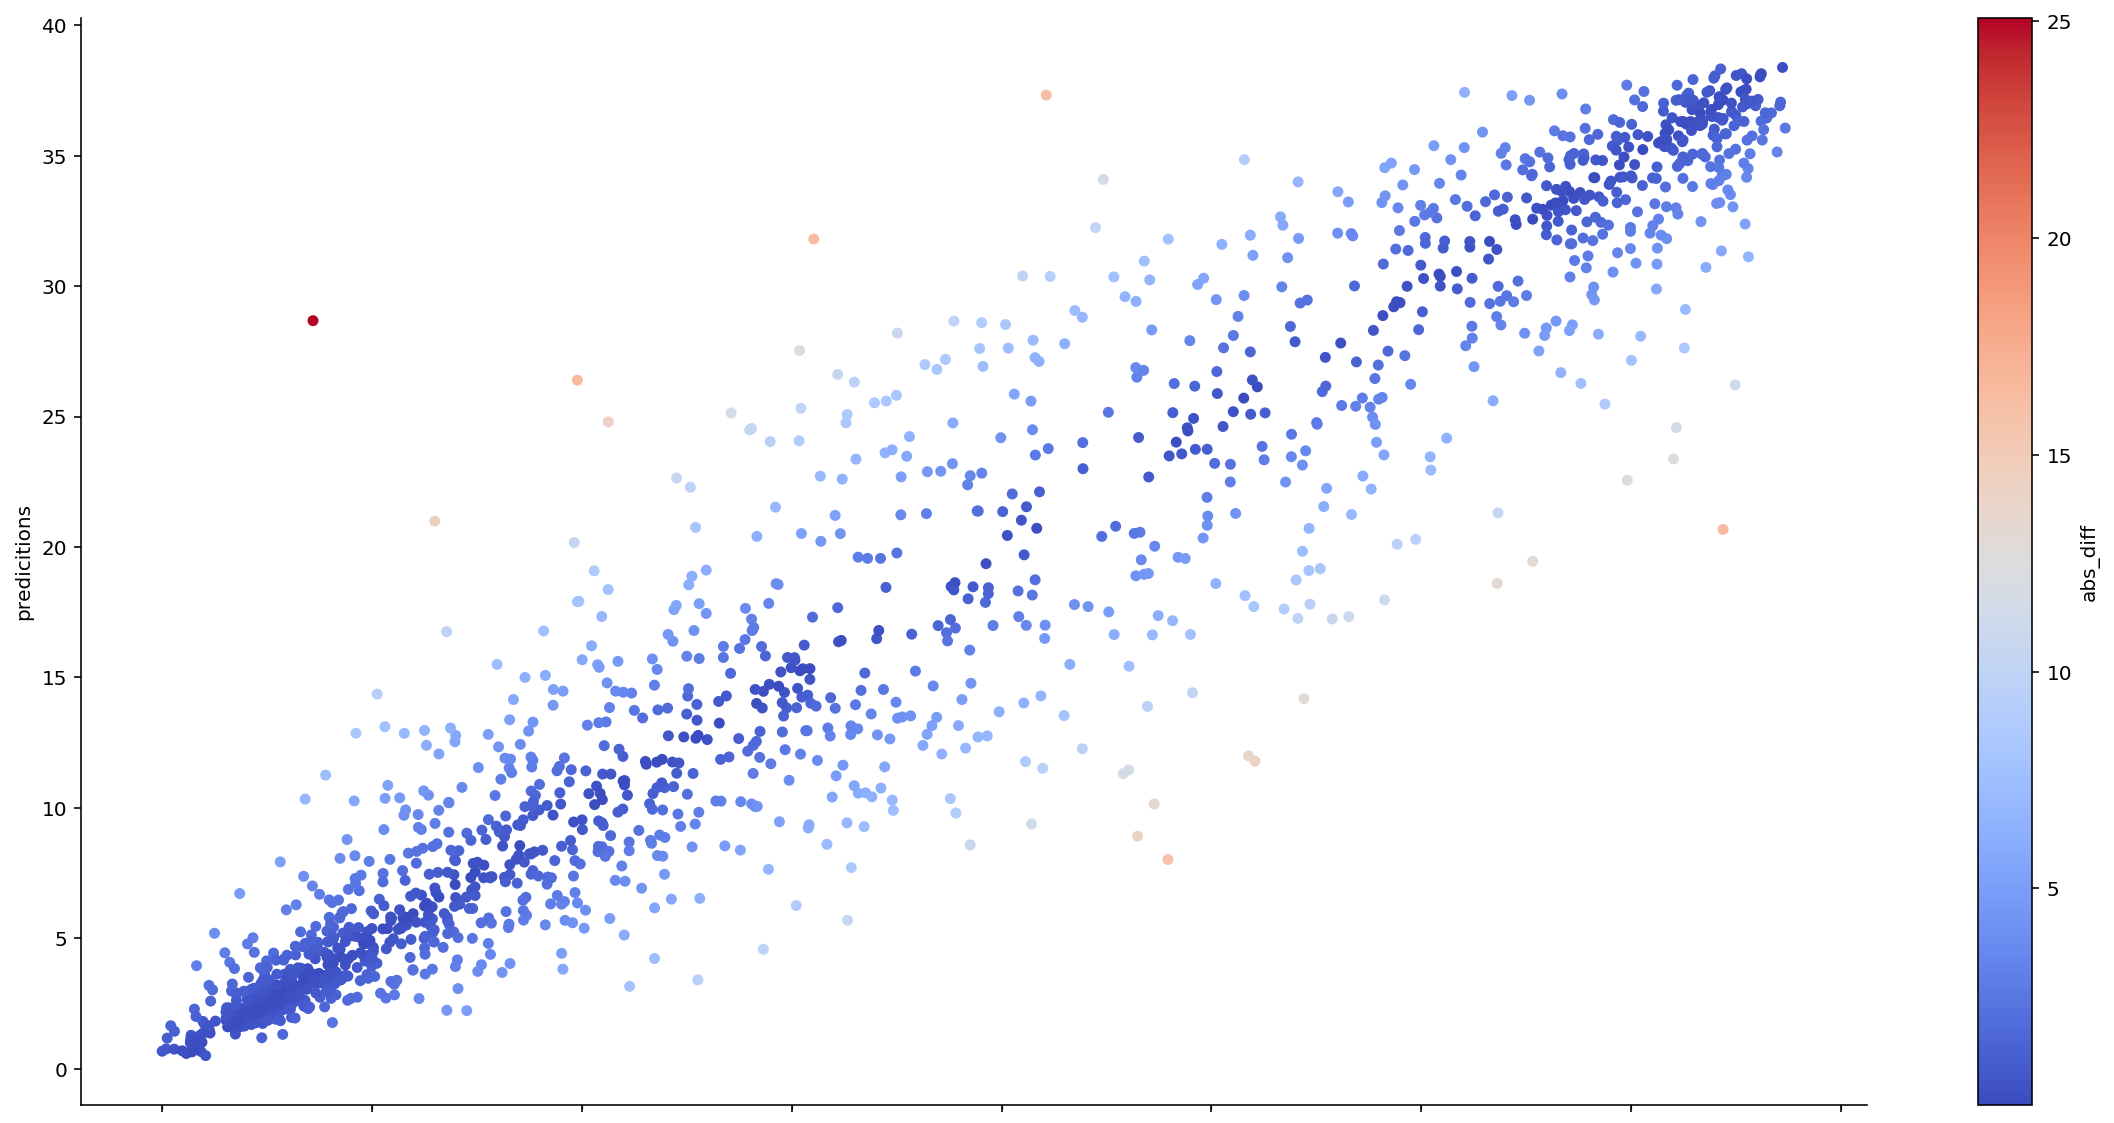

In [29]:
ax = Oversikt.plot.scatter(x='real',y='predicitions',
                   c='abs_diff',cmap='coolwarm', figsize = (20,10))

ax.set_xlabel("x label")

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('keras_model.png')

### Feilfordelingen av prediksjoner

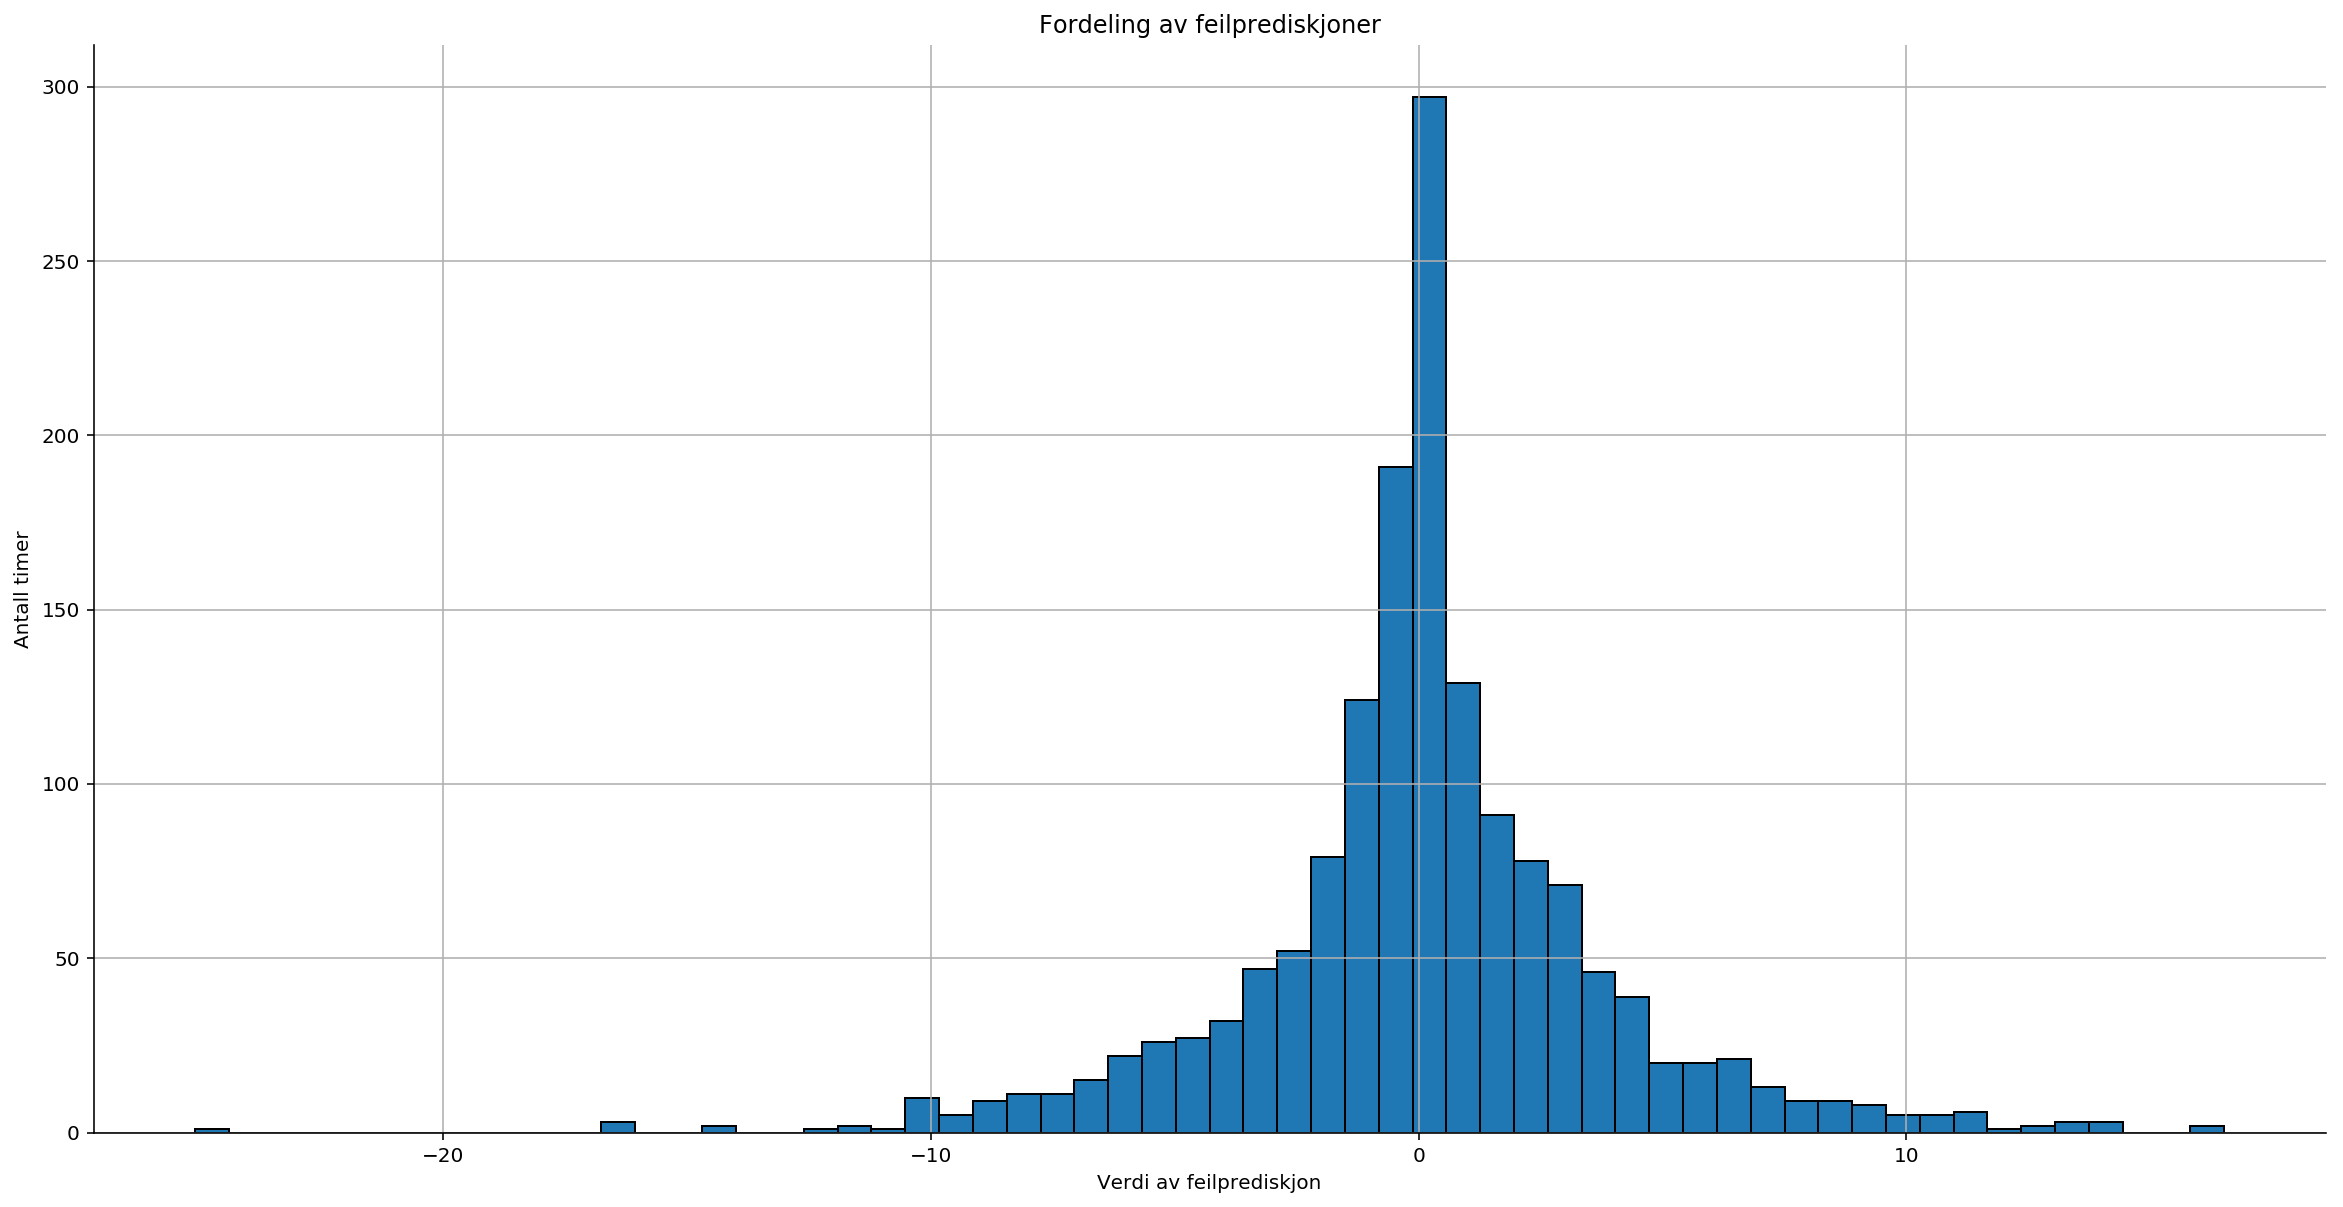

In [30]:
ax = Oversikt['differanse'].hist(bins=60,figsize = (20,10))

plt.xlabel('Verdi av feilprediskjon')
plt.ylabel('Antall timer')
plt.title('Fordeling av feilprediskjoner')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig = ax.get_figure()
#fig.savefig('hist av abs.png')

# Ekte plott av prediksjonene

#### Forsøk på å hente ut et utdrag av dataen

In [31]:
all_predictions = finished_model.predict(x[:,:])

predictions_all = list(all_predictions)

predictions_all_list = []

for pred in predictions_all:
    predictions_all_list.append(pred[0])
    
timeline = pd.DataFrame(data = {'real': y[:], 'predicitions': predictions_all_list})

# Adjust in order to plot 'dagens modell'
data_raw.dropna(inplace=True)
data_raw.reset_index(inplace=True)

#### Tidsplot av data

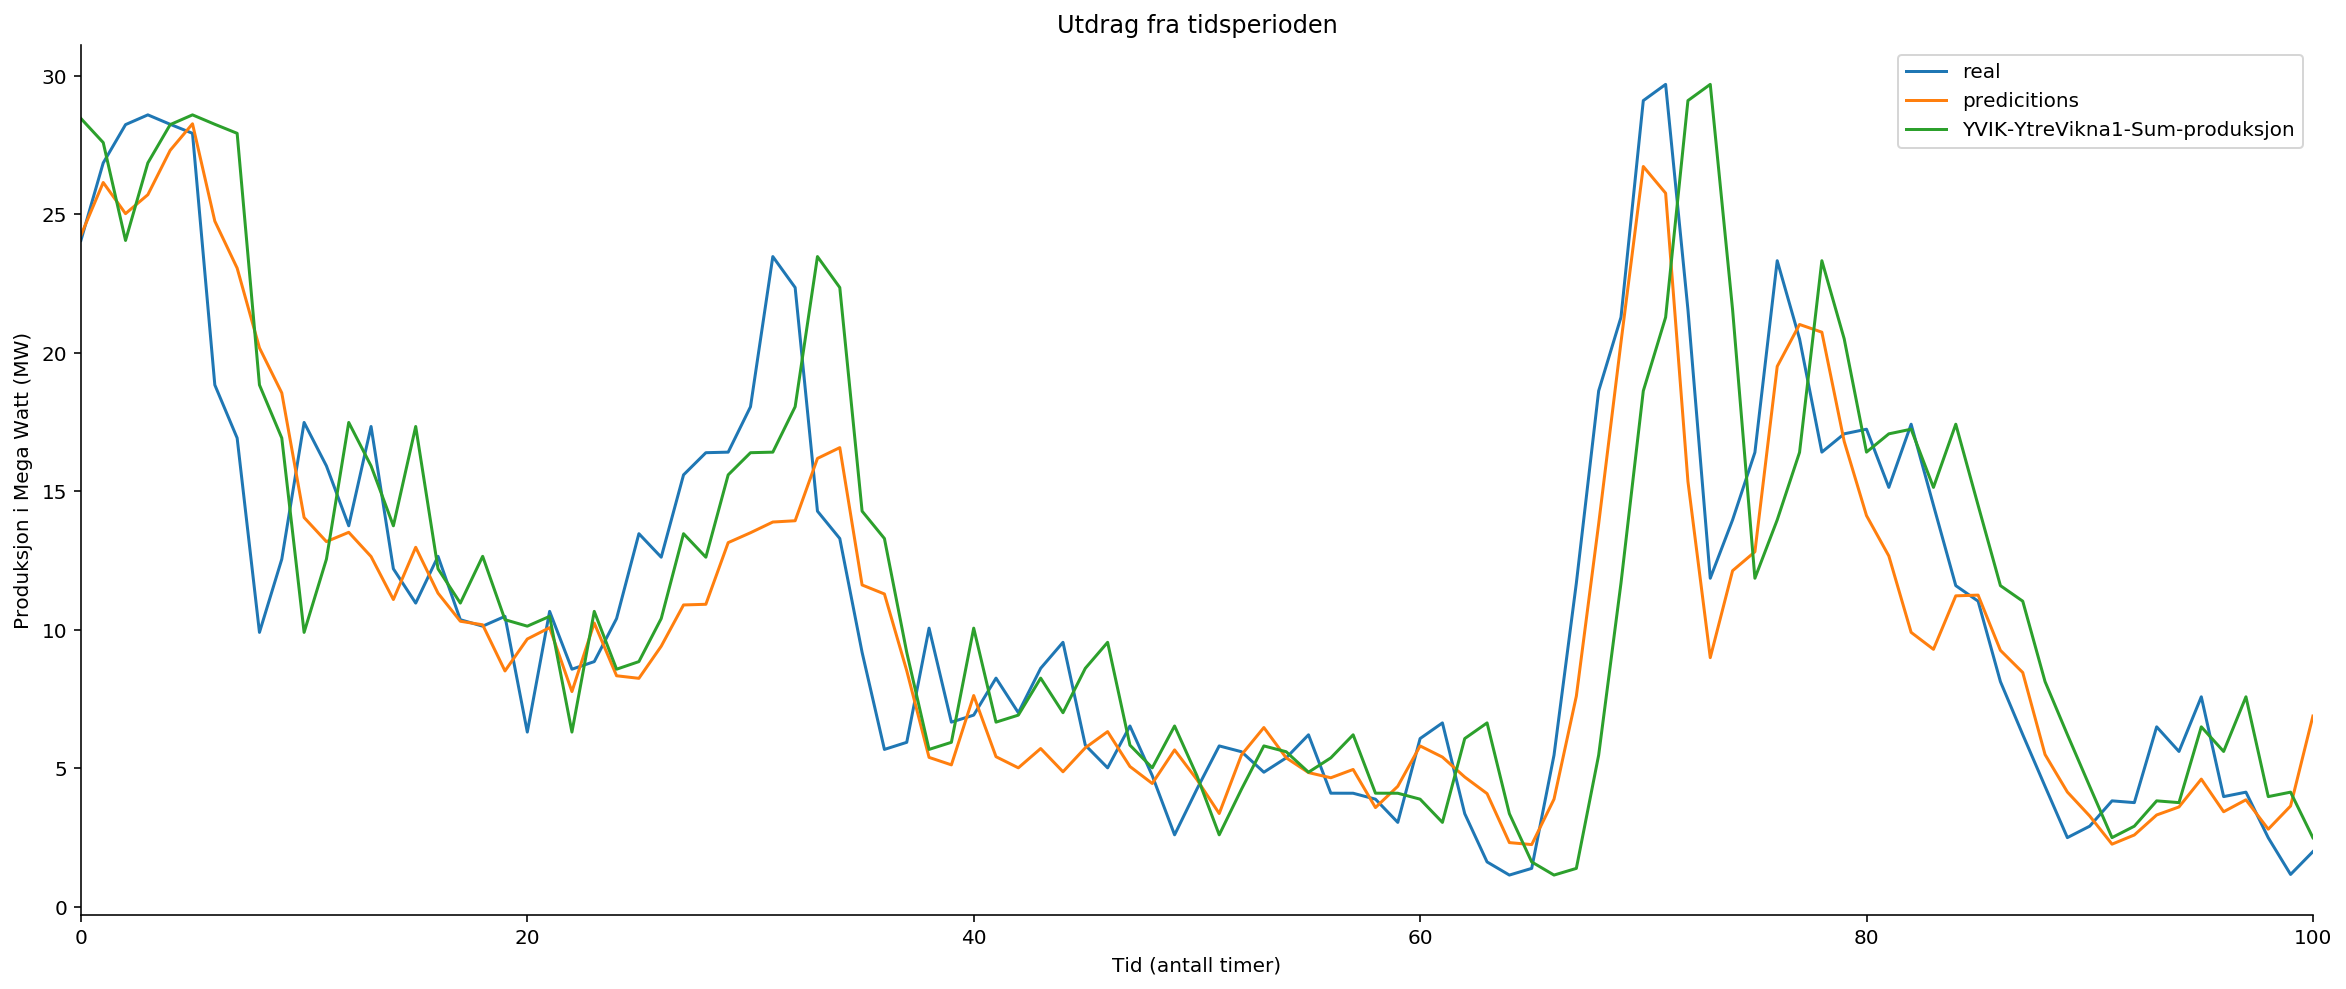

In [32]:
# Justere tidslinjen på plottet
start = 0
slutt = 100

ax = timeline.loc[start:slutt,'real'].plot(figsize=(20,8))
ax = timeline.loc[start:slutt,'predicitions'].plot(figsize=(20,8))
ax = data_raw.loc[start:slutt,'YVIK-YtreVikna1-Sum-produksjon'].plot(figsize=(20,8))

 
plt.xlabel('Tid (antall timer)')
plt.ylabel('Produksjon i Mega Watt (MW)')
plt.title('Utdrag fra tidsperioden')

plt.legend(loc='best')

#remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Saves figure
fig = ax.get_figure()
#fig.savefig('september10.png')